In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('produksi.csv')

In [3]:
df

,suhu,jumlah cacat
0,24,10
1,22,5
2,21,6
3,20,3
4,22,6
5,19,4
6,20,5
7,23,9
8,24,11
9,25,13


In [4]:
df.shape

(10, 2)

In [5]:
df.head()

,suhu,jumlah cacat
0,24,10
1,22,5
2,21,6
3,20,3
4,22,6


In [6]:
df.describe()

,suhu,jumlah cacat
count,10.00,10.00000
mean,22.00,7.20000
std,2.00,3.32666
min,19.00,3.00000
25%,20.25,5.00000
50%,22.00,6.00000
75%,23.75,9.75000
max,25.00,13.00000


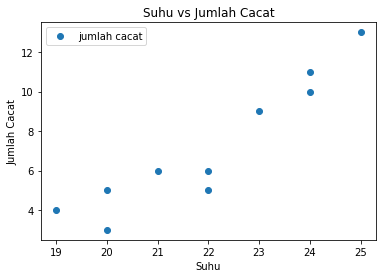

In [7]:
df.plot(x="suhu",y="jumlah cacat",style="o")
plt.title("Suhu vs Jumlah Cacat")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Cacat")
plt.show()

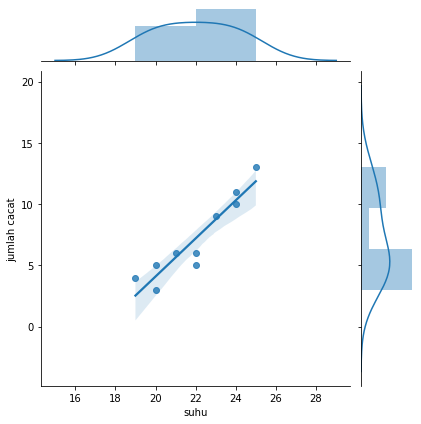

In [8]:
sns.jointplot(x=df['suhu'], y=df['jumlah cacat'], data=df, kind='reg')

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print(regressor.intercept_)

-26.33603238866398


In [13]:
print(regressor.coef_)

[1.51821862]


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,6,5.546559
1,11,10.101215


In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.6761133603238889
Mean Squared Error: 0.5067121244406593
Root Mean Squared Error: 0.7118371474155162
Model R^2 Square value 0.9189260600894945


Text(0.5, 1.0, 'Linear Regression')

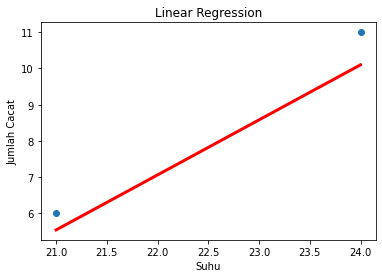

In [17]:
#Model Regression line on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Suhu')
plt.ylabel('Jumlah Cacat')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

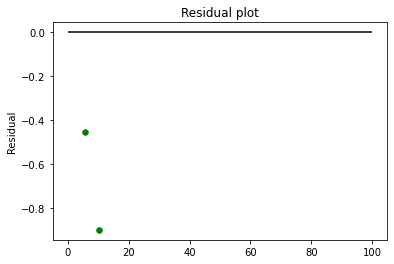

In [18]:
#Residual plot
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c='g', s = 30)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')